In [5]:
import plotly.graph_objects as go
import pandas as pd
import plotly.express as px

# Reading the CSV data into a DataFrame
df = pd.read_csv('Percentage Goods Rail 2020 -2022.csv')

# Check for missing values in the 'goods category' column
print("Missing values in 'goods category':", df['goods category'].isnull().sum())

# Drop rows where 'goods category' is missing
df = df.dropna(subset=['goods category'])

# Ensure that 'goods category' is of string data type
df['goods category'] = df['goods category'].astype(str)

# Create a color scale
color_scale = px.colors.sequential.Plasma

# Create the bar chart
fig = go.Figure()

for i, category in enumerate(df['goods category']):
    fig.add_trace(go.Bar(
        x=[category],
        y=[df['percentage'].iloc[i]],
        name=str(category),  # Convert category to string just to be sure
        marker=dict(color=color_scale[i % len(color_scale)]),
    ))

# Format y-axis to display as percentage and set the range
fig.update_layout(
    yaxis=dict(
        tickformat='.0%',
        range=[-0.5, 3]
    ),
    xaxis=dict(
        tickvals=[]  # This removes the x-axis tick labels
    ),
    height=1000,
    width=1000,
    title="Goods Category Percentage by Rail Increase/Decrease 2020 - 2022",
    showlegend=True,
    barmode='group'  # This is important to display the bars side by side
)

# Display the plot
fig.show()

Missing values in 'goods category': 1


In [26]:
import plotly.graph_objects as go
import pandas as pd
import plotly.express as px

# Reading the CSV data into a DataFrame
df = pd.read_csv('Percentage Goods Rail 2018 -2020.csv')

# Check for missing values in the 'goods category' column
print("Missing values in 'goods category':", df['goods category'].isnull().sum())

# Drop rows where 'goods category' is missing
df = df.dropna(subset=['goods category'])

# Ensure that 'goods category' is of string data type
df['goods category'] = df['goods category'].astype(str)

# Create a color scale
color_scale = px.colors.sequential.Plasma

# Create the bar chart
fig = go.Figure()

for i, category in enumerate(df['goods category']):
    fig.add_trace(go.Bar(
        x=[category],
        y=[df['percentage'].iloc[i]],
        name=str(category),  # Convert category to string just to be sure
        marker=dict(color=color_scale[i % len(color_scale)]),
    ))

# Format y-axis to display as percentage and set the range
fig.update_layout(
    yaxis=dict(
        tickformat='.0%',
        range=[-1, 5]
    ),
    xaxis=dict(
        tickvals=[]  # This removes the x-axis tick labels
    ),
    height=1000,
    width=1000,
    title="Goods Category Percentage by Rail Increase/Decrease 2018 - 2020",
    showlegend=True,
    barmode='group'  # This is important to display the bars side by side
)

# Display the plot
fig.show()

Missing values in 'goods category': 0


In [10]:
import pandas as pd
import plotly.express as px

df = pd.read_csv('Rail Goods Transport 2015 - 2022.csv')  
df = df.loc[df['Goods Category'] != 'Total transported goods']

# Convert 'year' column to numeric for proper filtering
df['year'] = pd.to_numeric(df['year'], errors='coerce')

# Filter the data to include only the years 2018 to 2022
df = df[(df['year'] >= 2018) & (df['year'] <= 2022)]

df['amount'] = df['amount'].str.replace(',', '').astype(float)

# Aggregate the data to have the total amount per Goods Category
df_sum = df.groupby('Goods Category')['amount'].sum().reset_index()

# Filter out categories contributing less than 1%
total_amount = df_sum['amount'].sum()
df_sum = df_sum[df_sum['amount'] / total_amount >= 0.01]

# Define a custom color sequence
colors = px.colors.qualitative.Set2

# Creating a donut pie chart
fig = px.pie(df_sum, names='Goods Category', values='amount',
             title='Transported Goods Distribution (2018 - 2022)', 
             hole=0.3, color_discrete_sequence=colors)

# Update the layout if needed
fig.update_layout(
    height=1000,
    width=1000  
)

# Show the plot
fig.show()


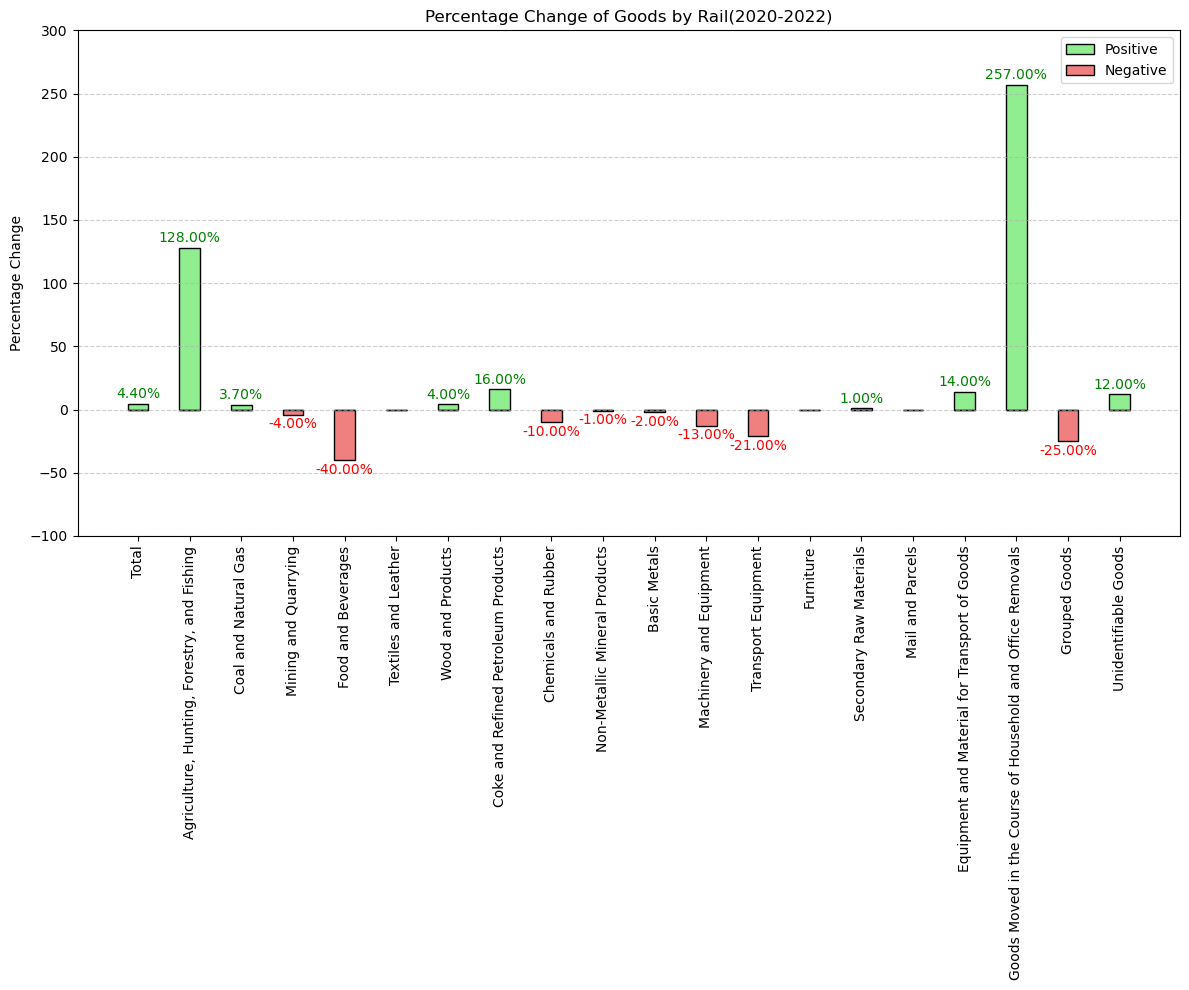

In [25]:
import matplotlib.pyplot as plt
import numpy as np

goods = [
    "Total",
    "Agriculture, Hunting, Forestry, and Fishing",
    "Coal and Natural Gas",
    "Mining and Quarrying",
    "Food and Beverages",
    "Textiles and Leather",
    "Wood and Products",
    "Coke and Refined Petroleum Products",
    "Chemicals and Rubber",
    "Non-Metallic Mineral Products",
    "Basic Metals",
    "Machinery and Equipment",
    "Transport Equipment",
    "Furniture",
    "Secondary Raw Materials",
    "Mail and Parcels",
    "Equipment and Material for Transport of Goods",
    "Goods Moved in the Course of Household and Office Removals",
    "Grouped Goods",
    "Unidentifiable Goods",
]

percentages_2020_2022 = [
    4.4,
    128,
    3.7,
    -4,
    -40,
    0,
    4,
    16,
    -10,
    -1,
    -2,
    -13,
    -21,
    0,
    1,
    0,
    14,
    257,
    -25,
    12,
]

positive_percentages_2020_2022 = [x if x > 0 else 0 for x in percentages_2020_2022]
negative_percentages_2020_2022 = [x if x < 0 else 0 for x in percentages_2020_2022]

fig, ax = plt.subplots(figsize=(12, 10))

bar_width = 0.4
index = np.arange(len(goods))

ax.bar(index, positive_percentages_2020_2022, bar_width, color='lightgreen', label='Positive', edgecolor='black')
ax.bar(index, negative_percentages_2020_2022, bar_width, color='lightcoral', label='Negative', edgecolor='black')

for i, (pos, neg) in enumerate(zip(positive_percentages_2020_2022, negative_percentages_2020_2022)):
    if pos > 0:
        ax.text(i, pos + 2, f'{pos:.2f}%', ha='center', va='bottom', fontsize=10, color='green')
    if neg < 0:
        ax.text(i, neg - 2, f'{neg:.2f}%', ha='center', va='top', fontsize=10, color='red')

ax.set_xticks(index)
ax.set_xticklabels(goods, rotation=90, fontsize=10)


ax.set_ylim(top=300, bottom=-100)  # Adjust the values as needed

plt.ylabel('Percentage Change')
plt.title('Percentage Change of Goods by Rail(2020-2022)')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()

plt.show()

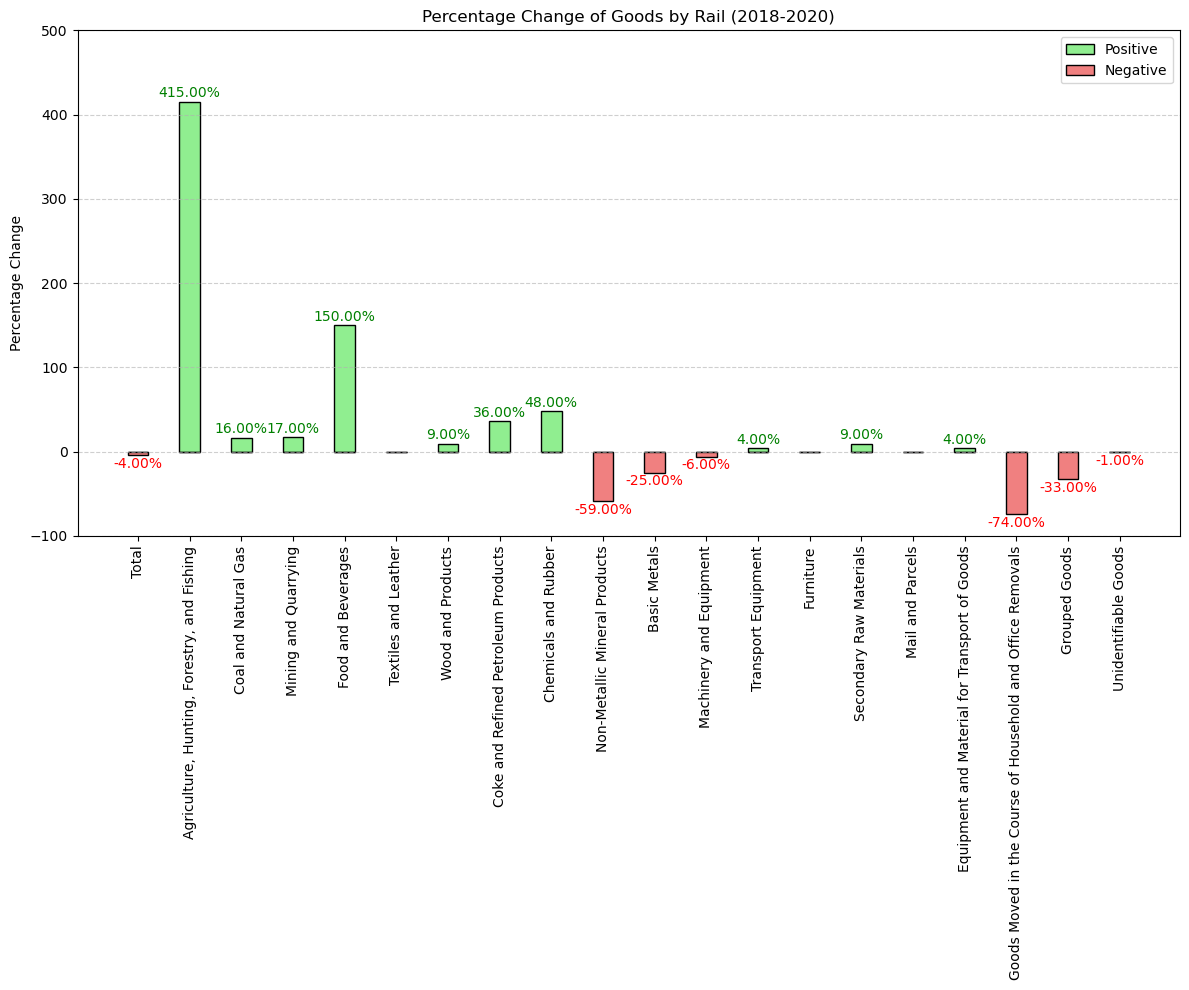

In [24]:
import matplotlib.pyplot as plt
import numpy as np

goods = [
    "Total",
    "Agriculture, Hunting, Forestry, and Fishing",
    "Coal and Natural Gas",
    "Mining and Quarrying",
    "Food and Beverages",
    "Textiles and Leather",
    "Wood and Products",
    "Coke and Refined Petroleum Products",
    "Chemicals and Rubber",
    "Non-Metallic Mineral Products",
    "Basic Metals",
    "Machinery and Equipment",
    "Transport Equipment",
    "Furniture",
    "Secondary Raw Materials",
    "Mail and Parcels",
    "Equipment and Material for Transport of Goods",
    "Goods Moved in the Course of Household and Office Removals",
    "Grouped Goods",
    "Unidentifiable Goods",
]

percentages_2020_2022 = [
    -4,
    415,
    16,
    17,
    150,
    0,
    9,
    36,
    48,
    -59,
    -25,
    -6,
    4,
    0,
    9,
    0,
    4,
    -74,
    -33,
    -1,
]

positive_percentages_2020_2022 = [x if x > 0 else 0 for x in percentages_2020_2022]
negative_percentages_2020_2022 = [x if x < 0 else 0 for x in percentages_2020_2022]

fig, ax = plt.subplots(figsize=(12, 10))

bar_width = 0.4
index = np.arange(len(goods))

ax.bar(index, positive_percentages_2020_2022, bar_width, color='lightgreen', label='Positive', edgecolor='black')
ax.bar(index, negative_percentages_2020_2022, bar_width, color='lightcoral', label='Negative', edgecolor='black')

for i, (pos, neg) in enumerate(zip(positive_percentages_2020_2022, negative_percentages_2020_2022)):
    if pos > 0:
        ax.text(i, pos + 2, f'{pos:.2f}%', ha='center', va='bottom', fontsize=10, color='green')
    if neg < 0:
        ax.text(i, neg - 2, f'{neg:.2f}%', ha='center', va='top', fontsize=10, color='red')

ax.set_xticks(index)
ax.set_xticklabels(goods, rotation=90, fontsize=10)


ax.set_ylim(top=500, bottom=-100)  # Adjust the values as needed

plt.ylabel('Percentage Change')
plt.title('Percentage Change of Goods by Rail (2018-2020)')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()

plt.show()